# 이커머스 데이터

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='ignore')
pd.set_option('display.max_columns', None)

In [2]:
# 데이터 불러오고 전처리하기
user_metadata_url = "https://raw.githubusercontent.com/dajeong-lecture/raw_data/main/user_meta_data.csv"
user_statsdata_url ="https://raw.githubusercontent.com/dajeong-lecture/raw_data/main/user_stats_data.csv"

user_metadata_df = pd.read_csv(user_metadata_url, parse_dates=[0])
user_stats_df = pd.read_csv(user_statsdata_url, parse_dates=[0])

In [3]:
user_metadata_df.shape, user_stats_df.shape

((3412, 10), (3412, 11))

In [4]:
user_metadata_df.head()

,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt
0,KjIRvUKVTgxGaek,0,1995,300,3,2019-09-09,NaT,NaN,AOS,4
1,QWhJIG1fOkhUJzG,1,1995,300,2,2020-04-13,NaT,NaN,AOS,1
2,5UD76uKfYNPTliG,1,1999,300,4,2018-12-18,NaT,NaN,AOS,6
3,lfpxRIsbmmt6mUQ,0,1998,300,7,2019-01-16,NaT,NaN,AOS,2
4,djGLdEHvJy17TDX,1,1999,300,6,2019-11-06,NaT,NaN,AOS,2


In [5]:
user_stats_df.head()

,user_id,membership_type,total_order_cnt,total_cost,avg_coupon_amt,avg_point_amt,weekly_order_cnt,monthly_order_cnt,avg_cost,avg_item_cost,last_date
0,q3qlSo1pvyacJoy,100,1.0,23800.0,0.0,0.0,1.000,1.00,23800.00,0.00,2020-04-05
1,JRy7QRK0UMFP81X,100,1.0,23000.0,0.0,0.0,1.000,1.00,23000.00,10000.00,2020-01-17
2,Z0IzeePX3LwQ2Ea,100,1.0,24000.0,0.0,0.0,1.000,1.00,24000.00,24000.00,2020-05-15
3,EoRzAGlei59fugN,100,1.0,22000.0,-5000.0,0.0,1.000,1.00,22000.00,14000.00,2020-03-02
4,zgQJlOYlFURl6ev,300,19.0,561200.0,0.0,0.0,2.375,4.75,29536.84,24615.79,2020-06-23


In [6]:
user_metadata_df.dtypes

user_id             object
sex                  int64
birthday_year        int64
membership_type      int64
category_prefer      int64
joined_date         object
deleted_date        object
join_path          float64
os                  object
recommended_cnt      int64
dtype: object

In [7]:
# 생일년도 사용하여 2021년 기준 고객 나이정보 생성하기
this_year = 2021
user_metadata_df["age"] = this_year - user_metadata_df["birthday_year"] + 1
user_metadata_df.head()

,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt,age
0,KjIRvUKVTgxGaek,0,1995,300,3,2019-09-09,NaT,NaN,AOS,4,27
1,QWhJIG1fOkhUJzG,1,1995,300,2,2020-04-13,NaT,NaN,AOS,1,27
2,5UD76uKfYNPTliG,1,1999,300,4,2018-12-18,NaT,NaN,AOS,6,23
3,lfpxRIsbmmt6mUQ,0,1998,300,7,2019-01-16,NaT,NaN,AOS,2,24
4,djGLdEHvJy17TDX,1,1999,300,6,2019-11-06,NaT,NaN,AOS,2,23


In [8]:
# 가입일자 사용하여 2021년 1월 1일 기준 고객 가입기간 생성하기
today_ymd=datetime(2021, 1, 1)

# 가입일자(object) -> 날짜형식 변경
user_metadata_df["joined_date"] = user_metadata_df["joined_date"].astype("datetime64[ns]")

user_metadata_df["days_from_joined"] = (today_ymd - user_metadata_df["joined_date"]).dt.days
user_metadata_df["years_from_joined"] = (today_ymd - user_metadata_df["joined_date"]) / np.timedelta64(1, "Y")
user_metadata_df["years_from_joined"] = user_metadata_df["years_from_joined"].round(1)
user_metadata_df.head()

,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt,age,days_from_joined,years_from_joined
0,KjIRvUKVTgxGaek,0,1995,300,3,2019-09-09,NaT,NaN,AOS,4,27,480,1.3
1,QWhJIG1fOkhUJzG,1,1995,300,2,2020-04-13,NaT,NaN,AOS,1,27,263,0.7
2,5UD76uKfYNPTliG,1,1999,300,4,2018-12-18,NaT,NaN,AOS,6,23,745,2.0
3,lfpxRIsbmmt6mUQ,0,1998,300,7,2019-01-16,NaT,NaN,AOS,2,24,716,2.0
4,djGLdEHvJy17TDX,1,1999,300,6,2019-11-06,NaT,NaN,AOS,2,23,422,1.2


In [9]:
# 탈퇴일자 생성하기
# 1: 탈퇴함, 0:탈퇴하지않음
user_metadata_df["if_deleted"] = np.where(user_metadata_df["deleted_date"]=="NaT", 0, 1)

In [10]:
user_metadata_df.head()

,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted
0,KjIRvUKVTgxGaek,0,1995,300,3,2019-09-09,NaT,NaN,AOS,4,27,480,1.3,0
1,QWhJIG1fOkhUJzG,1,1995,300,2,2020-04-13,NaT,NaN,AOS,1,27,263,0.7,0
2,5UD76uKfYNPTliG,1,1999,300,4,2018-12-18,NaT,NaN,AOS,6,23,745,2.0,0
3,lfpxRIsbmmt6mUQ,0,1998,300,7,2019-01-16,NaT,NaN,AOS,2,24,716,2.0,0
4,djGLdEHvJy17TDX,1,1999,300,6,2019-11-06,NaT,NaN,AOS,2,23,422,1.2,0


In [11]:
user_stats_df.dtypes

user_id               object
membership_type        int64
total_order_cnt      float64
total_cost           float64
avg_coupon_amt       float64
avg_point_amt        float64
weekly_order_cnt     float64
monthly_order_cnt    float64
avg_cost             float64
avg_item_cost        float64
last_date             object
dtype: object

In [12]:
user_stats_df.head()

,user_id,membership_type,total_order_cnt,total_cost,avg_coupon_amt,avg_point_amt,weekly_order_cnt,monthly_order_cnt,avg_cost,avg_item_cost,last_date
0,q3qlSo1pvyacJoy,100,1.0,23800.0,0.0,0.0,1.000,1.00,23800.00,0.00,2020-04-05
1,JRy7QRK0UMFP81X,100,1.0,23000.0,0.0,0.0,1.000,1.00,23000.00,10000.00,2020-01-17
2,Z0IzeePX3LwQ2Ea,100,1.0,24000.0,0.0,0.0,1.000,1.00,24000.00,24000.00,2020-05-15
3,EoRzAGlei59fugN,100,1.0,22000.0,-5000.0,0.0,1.000,1.00,22000.00,14000.00,2020-03-02
4,zgQJlOYlFURl6ev,300,19.0,561200.0,0.0,0.0,2.375,4.75,29536.84,24615.79,2020-06-23


In [13]:
# 마지막 거래일자 범위 확인
user_stats_df.last_date.min(), user_stats_df.last_date.max()

('2020-01-01', '2020-06-30')

In [14]:
# 마지막 거래일자의 가장 오래된 날짜를 선택하여 Recency의 정도를 알아보는 커럼 생성하기
oldest_ymd = datetime(2019,12,31)
user_stats_df["last_date"] = user_stats_df["last_date"].astype("datetime64[ns]")
user_stats_df["days_of_recency"] = (user_stats_df["last_date"] - oldest_ymd).dt.days

In [15]:
user_stats_df.head()

,user_id,membership_type,total_order_cnt,total_cost,avg_coupon_amt,avg_point_amt,weekly_order_cnt,monthly_order_cnt,avg_cost,avg_item_cost,last_date,days_of_recency
0,q3qlSo1pvyacJoy,100,1.0,23800.0,0.0,0.0,1.000,1.00,23800.00,0.00,2020-04-05,96
1,JRy7QRK0UMFP81X,100,1.0,23000.0,0.0,0.0,1.000,1.00,23000.00,10000.00,2020-01-17,17
2,Z0IzeePX3LwQ2Ea,100,1.0,24000.0,0.0,0.0,1.000,1.00,24000.00,24000.00,2020-05-15,136
3,EoRzAGlei59fugN,100,1.0,22000.0,-5000.0,0.0,1.000,1.00,22000.00,14000.00,2020-03-02,62
4,zgQJlOYlFURl6ev,300,19.0,561200.0,0.0,0.0,2.375,4.75,29536.84,24615.79,2020-06-23,175


In [16]:
user_metadata_df.isnull().sum(axis=0)

user_id                 0
sex                     0
birthday_year           0
membership_type         0
category_prefer         0
joined_date             0
deleted_date            0
join_path            2888
os                      0
recommended_cnt         0
age                     0
days_from_joined        0
years_from_joined       0
if_deleted              0
dtype: int64

In [17]:
user_metadata_df["join_path"] = user_metadata_df["join_path"].fillna(0)

In [18]:
# user_id 기준으로 중복데이터 확인
user_metadata_df[user_metadata_df.duplicated(["user_id"])]
# 중복 데이터 삭제
user_metadata_df.drop_duplicates(subset="user_id")

,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted
0,KjIRvUKVTgxGaek,0,1995,300,3,2019-09-09,NaT,0.0,AOS,4,27,480,1.3,0
1,QWhJIG1fOkhUJzG,1,1995,300,2,2020-04-13,NaT,0.0,AOS,1,27,263,0.7,0
2,5UD76uKfYNPTliG,1,1999,300,4,2018-12-18,NaT,0.0,AOS,6,23,745,2.0,0
3,lfpxRIsbmmt6mUQ,0,1998,300,7,2019-01-16,NaT,0.0,AOS,2,24,716,2.0,0
4,djGLdEHvJy17TDX,1,1999,300,6,2019-11-06,NaT,0.0,AOS,2,23,422,1.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3407,K0qchcNENCEDzPH,1,1995,100,5,2019-02-08,NaT,0.0,AOS,3,27,693,1.9,0
3408,EgkSw32Hq7ueGrf,0,1981,100,0,2019-09-05,NaT,0.0,AOS,0,41,484,1.3,0
3409,wvzkibB8S2Oth9b,0,1978,100,0,2017-10-16,NaT,0.0,AOS,0,44,1173,3.2,0
3410,8WI83Ev0nnBfMB7,1,1988,100,8,2017-12-06,NaT,0.0,AOS,0,34,1122,3.1,0


In [19]:
# membership_type 별 고객분포 확인
user_metadata_df.groupby(["membership_type"])[["user_id"]].count()

,user_id
membership_type,
100,2667
300,513
400,126
500,106


In [20]:
# 가입기간에 따른 고객 분포 확인하기
user_cnt_from_joined_df = user_metadata_df.groupby(["years_from_joined"])[["user_id"]].count().reset_index()
fig = px.bar(user_cnt_from_joined_df, x="years_from_joined", y="user_id")
fig.update_layout(height=500, width=1000)
fig.show()

In [21]:
# 카테고리 선호 입력수에 따른 고객 분포 확인

user_cnt_by_ctg_df = user_metadata_df.groupby(["category_prefer"])[["user_id"]].count().reset_index()
fig = px.bar(user_cnt_by_ctg_df, x="category_prefer", y="user_id")
fig.update_layout(height=500, width=1000)
fig.show()

In [22]:
# 친구추천 횟수에 따른 고객 분포 확인

user_cnt_by_recomm_df = user_metadata_df.groupby(["recommended_cnt"])[["user_id"]].count().reset_index()
fig = px.bar(user_cnt_by_recomm_df, x="recommended_cnt", y="user_id")
fig.update_layout(height=500, width=1000)
fig.show()

In [23]:
# 고객(메타데이터) 2차원에서 살펴보기
# 변수 간 상관계수 확인
corr_matrix = user_metadata_df.corr()
corr_matrix

,sex,birthday_year,membership_type,category_prefer,join_path,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted
sex,1.000000,-0.005282,0.001593,-0.006267,-0.017552,-0.013729,0.005282,-0.016833,-0.016351,0.001651
birthday_year,-0.005282,1.000000,-0.069491,0.504292,0.009461,0.258950,-1.000000,-0.138338,-0.138318,0.021408
membership_type,0.001593,-0.069491,1.000000,-0.053046,0.019963,-0.021604,0.069491,0.037165,0.036992,0.009109
category_prefer,-0.006267,0.504292,-0.053046,1.000000,0.002226,0.171625,-0.504292,-0.007478,-0.007576,0.013642
join_path,-0.017552,0.009461,0.019963,0.002226,1.000000,0.006406,-0.009461,-0.064171,-0.063883,-0.020725
recommended_cnt,-0.013729,0.258950,-0.021604,0.171625,0.006406,1.000000,-0.258950,0.186742,0.187304,0.009055
age,0.005282,-1.000000,0.069491,-0.504292,-0.009461,-0.258950,1.000000,0.138338,0.138318,-0.021408
days_from_joined,-0.016833,-0.138338,0.037165,-0.007478,-0.064171,0.186742,0.138338,1.000000,0.999718,-0.010898
years_from_joined,-0.016351,-0.138318,0.036992,-0.007576,-0.063883,0.187304,0.138318,0.999718,1.000000,-0.011358
if_deleted,0.001651,0.021408,0.009109,0.013642,-0.020725,0.009055,-0.021408,-0.010898,-0.011358,1.000000


In [24]:
corr_matrix[abs(corr_matrix)>=0.2] # 상관계수가 절대값 기준 0.2 이상인 것을 출력

,sex,birthday_year,membership_type,category_prefer,join_path,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted
sex,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
birthday_year,NaN,1.000000,NaN,0.504292,NaN,0.25895,-1.000000,NaN,NaN,NaN
membership_type,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category_prefer,NaN,0.504292,NaN,1.000000,NaN,NaN,-0.504292,NaN,NaN,NaN
join_path,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
recommended_cnt,NaN,0.258950,NaN,NaN,NaN,1.00000,-0.258950,NaN,NaN,NaN
age,NaN,-1.000000,NaN,-0.504292,NaN,-0.25895,1.000000,NaN,NaN,NaN
days_from_joined,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.999718,NaN
years_from_joined,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999718,1.000000,NaN
if_deleted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [25]:
corr_matrix.style.background_gradient()

,sex,birthday_year,membership_type,category_prefer,join_path,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted
sex,1.000000,-0.005282,0.001593,-0.006267,-0.017552,-0.013729,0.005282,-0.016833,-0.016351,0.001651
birthday_year,-0.005282,1.000000,-0.069491,0.504292,0.009461,0.258950,-1.000000,-0.138338,-0.138318,0.021408
membership_type,0.001593,-0.069491,1.000000,-0.053046,0.019963,-0.021604,0.069491,0.037165,0.036992,0.009109
category_prefer,-0.006267,0.504292,-0.053046,1.000000,0.002226,0.171625,-0.504292,-0.007478,-0.007576,0.013642
join_path,-0.017552,0.009461,0.019963,0.002226,1.000000,0.006406,-0.009461,-0.064171,-0.063883,-0.020725
recommended_cnt,-0.013729,0.258950,-0.021604,0.171625,0.006406,1.000000,-0.258950,0.186742,0.187304,0.009055
age,0.005282,-1.000000,0.069491,-0.504292,-0.009461,-0.258950,1.000000,0.138338,0.138318,-0.021408
days_from_joined,-0.016833,-0.138338,0.037165,-0.007478,-0.064171,0.186742,0.138338,1.000000,0.999718,-0.010898
years_from_joined,-0.016351,-0.138318,0.036992,-0.007576,-0.063883,0.187304,0.138318,0.999718,1.000000,-0.011358
if_deleted,0.001651,0.021408,0.009109,0.013642,-0.020725,0.009055,-0.021408,-0.010898,-0.011358,1.000000


In [26]:
# age & category_prefer 관계를 나타내는 scatter plot 그리기
fig = px.scatter(x=user_metadata_df["age"], y=user_metadata_df["category_prefer"])
fig.update_layout(width=600, height=500)
fig.show()

In [27]:
fig = px.scatter(x=user_metadata_df["age"], y=user_metadata_df["recommended_cnt"])
fig.update_layout(width=600, height=500)
fig.show()

In [28]:
user_metadata_df.pivot_table(values="user_id", index="sex", columns="join_path", aggfunc="count")

join_path,0.0,1.0
sex,,
0,1253,240
1,1635,284


In [29]:
# 고객 메타데이터 정제 및 데이터셋 분리
# 군집분석을 위한 변수만 남기기 - str / categorical 변수는 clustering에 적합하지 않음.
numerics_types = ["int16", "int32", "int64", "float16", "float32", "float64"]
user_numerics_df = user_metadata_df.select_dtypes(include=numerics_types)
user_numerics_df.head()

,sex,birthday_year,membership_type,category_prefer,join_path,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted
0,0,1995,300,3,0.0,4,27,480,1.3,0
1,1,1995,300,2,0.0,1,27,263,0.7,0
2,1,1999,300,4,0.0,6,23,745,2.0,0
3,0,1998,300,7,0.0,2,24,716,2.0,0
4,1,1999,300,6,0.0,2,23,422,1.2,0


In [30]:
# binary 변수 제거
user_binary_cols = [col for col in user_numerics_df if np.isin(user_numerics_df[col].unique(), [0,1]).all()]
user_numerics_df = user_numerics_df.drop(user_binary_cols, axis=1)

user_numerics_df.head(2)

,birthday_year,membership_type,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
0,1995,300,3,4,27,480,1.3
1,1995,300,2,1,27,263,0.7


In [31]:
# membership_type 변수 분리하기

user_x_columns = list(user_numerics_df.columns)
user_x_columns.remove("membership_type")
user_x_columns

['birthday_year',
 'category_prefer',
 'recommended_cnt',
 'age',
 'days_from_joined',
 'years_from_joined']

In [32]:
# train/test split
X = user_numerics_df[user_x_columns]
Y = user_numerics_df["membership_type"]

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2)
print(len(train_x), len(test_x))

2729 683


In [33]:
# K-means 최적의 k 찾기
from sklearn.cluster import KMeans

In [34]:
# elbow method
distortions = []
k_range = range(1, 11)

for i in k_range:
  km = KMeans(n_clusters=i, random_state=42)
  km.fit(train_x)
  distortions.append(km.inertia_)

In [35]:
distortions

[535037654.51368994,
 157165858.14918947,
 71656141.62389919,
 41167436.77901711,
 26581029.44488877,
 18901367.38389252,
 14192172.928535704,
 10556414.505157834,
 8339338.886218144,
 6915617.13388457]

In [36]:
# x축이 k의 수, y축이 distortion
fig = px.line(x=k_range, y=distortions, labels={"x":"k", "y":"distortions"})
fig.update_layout(width=800, height=500)
fig.show()

In [37]:
km = KMeans(n_clusters=3, random_state=42)
km.fit(train_x)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [38]:
# 각 군집의 변수별 중심값 비교
pd.DataFrame(km.cluster_centers_, columns=train_x.columns)

,birthday_year,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
0,1990.071501,4.476334,2.218530,31.928499,734.675730,2.011178
1,1989.139159,4.595469,3.045307,32.860841,1304.291262,3.570388
2,1991.822004,4.708408,1.940072,30.177996,235.677102,0.644723


In [39]:
km = KMeans(n_clusters=5, random_state=42)
km.fit(train_x)
pd.DataFrame(km.cluster_centers_, columns=train_x.columns)

,birthday_year,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
0,1988.739683,4.695238,3.082540,33.260317,1476.803175,4.042857
1,1990.239748,4.569401,2.126183,31.760252,705.323344,1.930284
2,1990.908789,4.552239,1.975124,31.091211,407.927032,1.118242
3,1989.650376,4.449248,2.864662,32.349624,1044.610902,2.858835
4,1992.262016,4.745736,1.891473,29.737984,131.768992,0.359535


In [40]:
# 각 군집별 데이터수 확인
label_list = list(km.labels_)
[[x, label_list.count(x)]for x in set(label_list)]

[[0, 315], [1, 632], [2, 602], [3, 532], [4, 648]]

In [41]:
km = KMeans(n_clusters=3)
km.fit(train_x)
pd.DataFrame(km.cluster_centers_, columns=train_x.columns)

,birthday_year,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
0,1990.056566,4.471717,2.211111,31.943434,733.277778,2.007273
1,1991.831692,4.712623,1.941808,30.168308,235.454790,0.644136
2,1989.154341,4.594855,3.048232,32.845659,1302.450161,3.565434


In [42]:
train_x["label_from_km"] = km.labels_
train_x.groupby("label_from_km").count()

,birthday_year,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
label_from_km,,,,,,
0,991,991,991,991,991,991
1,1118,1118,1118,1118,1118,1118
2,620,620,620,620,620,620


In [43]:
# 훈련 결과 시각화
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2, subplot_titles=("Actual", "K-means cluster"))

fig.add_trace(
    go.Scatter(x=train_x["recommended_cnt"],
               y=train_x["days_from_joined"],
               mode="markers"),
              row=1, col=1
)

fig.add_trace(
    go.Scatter(x=train_x["recommended_cnt"],
               y=train_x["days_from_joined"],
               mode="markers",
               marker=dict(color=train_x["label_from_km"]),
               ),
              row=1, col=2
)

fig.update_layout(height=600, width=800)
fig.show()

In [44]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Actual", "K-means cluster"))

fig.add_trace(
    go.Scatter(x=train_x["recommended_cnt"],
               y=train_x["category_prefer"],
               mode="markers"),
              row=1, col=1
)

fig.add_trace(
    go.Scatter(x=train_x["recommended_cnt"],
               y=train_x["category_prefer"],
               mode="markers",
               marker=dict(color=train_x["label_from_km"]),
               ),
              row=1, col=2
)

fig.update_layout(height=600, width=800)
fig.show()

In [45]:
# 3D 그래프로 변수 3개 시각화하기
fig = go.Figure(data=[go.Scatter3d(x=train_x["recommended_cnt"],
                                   y=train_x["days_from_joined"],
                                   z=train_x["category_prefer"],
                                   mode='markers',
                                   marker=dict(color=train_x["label_from_km"]))])
fig.show()

In [46]:
# 메타데이터 정규화
# Min-Max Normalization 모듈
from sklearn.preprocessing import MinMaxScaler

In [47]:
user_numerics_df.head()

,birthday_year,membership_type,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
0,1995,300,3,4,27,480,1.3
1,1995,300,2,1,27,263,0.7
2,1999,300,4,6,23,745,2.0
3,1998,300,7,2,24,716,2.0
4,1999,300,6,2,23,422,1.2


In [48]:
# 메타데이터들의 값들을 0, 1 사이의 값으로 정규화하기
mm_scaler = MinMaxScaler(feature_range=(0,1))
scaled_user_metadata = mm_scaler.fit_transform(user_numerics_df)
scaled_user_metadata

array([[0.71794872, 0.5       , 0.17647059, ..., 0.28205128, 0.26376652,
        0.26      ],
       [0.71794872, 0.5       , 0.11764706, ..., 0.28205128, 0.14427313,
        0.14      ],
       [0.82051282, 0.5       , 0.23529412, ..., 0.17948718, 0.40969163,
        0.4       ],
       ...,
       [0.28205128, 0.        , 0.        , ..., 0.71794872, 0.64537445,
        0.64      ],
       [0.53846154, 0.        , 0.47058824, ..., 0.46153846, 0.61729075,
        0.62      ],
       [0.79487179, 0.        , 0.29411765, ..., 0.20512821, 0.10737885,
        0.1       ]])

In [49]:
scaled_user_metadata_df = pd.DataFrame(scaled_user_metadata, columns=user_numerics_df.columns)
scaled_user_metadata_df.head()

,birthday_year,membership_type,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
0,0.717949,0.5,0.176471,0.190476,0.282051,0.263767,0.26
1,0.717949,0.5,0.117647,0.047619,0.282051,0.144273,0.14
2,0.820513,0.5,0.235294,0.285714,0.179487,0.409692,0.40
3,0.794872,0.5,0.411765,0.095238,0.205128,0.393722,0.40
4,0.820513,0.5,0.352941,0.095238,0.179487,0.231828,0.24


In [50]:
X = scaled_user_metadata_df[user_x_columns]
Y = scaled_user_metadata_df["membership_type"]

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2)
print(len(train_x), len(test_x))

2729 683


In [51]:
!pip install kneed

In [52]:
# distortions에 kneed 모듈 사용에 필요한 값 저장
distortions = []
k_range = range(1,11)

for i in k_range:
  km =KMeans(n_clusters=i, random_state=42)
  km.fit(train_x)
  distortions.append(km.inertia_)

distortions

[679.0303363508281,
 445.8040028582569,
 295.63735026872405,
 249.68183468052553,
 217.3164213917933,
 193.23638465428792,
 175.64221087929127,
 163.883306646017,
 153.8964361000369,
 145.4438566472088]

In [53]:
# kneed 모듈 사용하여 자동으로 elbow 값 찾기
from kneed import KneeLocator

kneedle = KneeLocator(x=k_range, y=distortions, curve="convex", direction="decreasing")
print(f"최적의 k : {round(kneedle.elbow, 3)}")
print(f"최적의 k의 y값 : {round(kneedle.elbow_y, 3)}")

최적의 k : 3
최적의 k의 y값 : 295.637


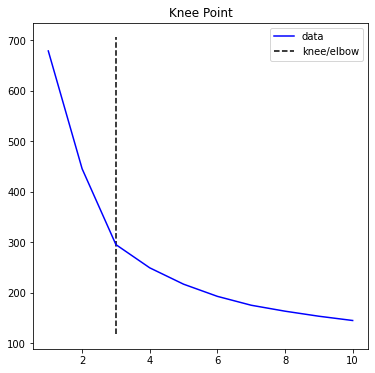

In [54]:
kneedle.plot_knee()

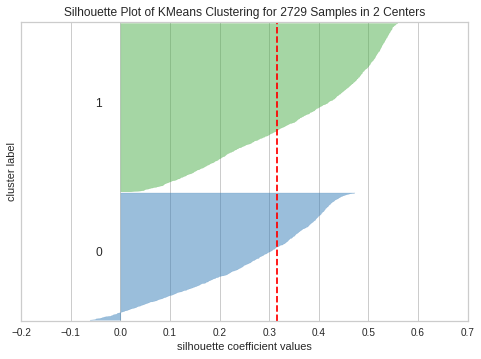

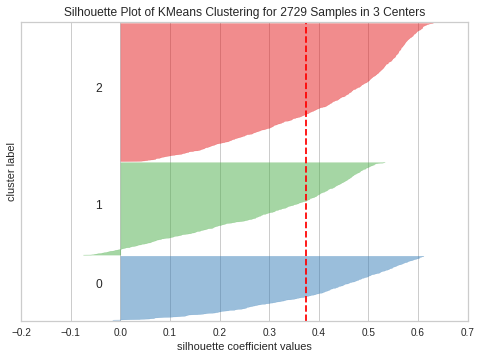

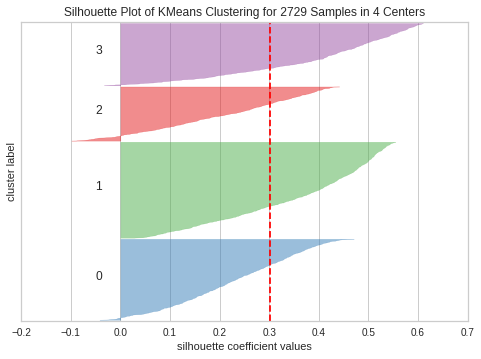

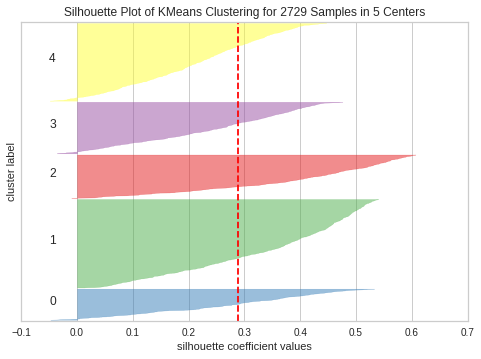

In [55]:
# SilhouetteVisualizer 사용하여 훈련과 그래프 한 번에 해겨하기
from yellowbrick.cluster import SilhouetteVisualizer

# 최소 2개 이상의 label/cluster가 존재해야함.
k_range = range(2, 6)
for i in k_range:
  km = KMeans(n_clusters = i, init="k-means++")
  visualizer = SilhouetteVisualizer(km)
  visualizer.fit(train_x)
  visualizer.poof()

In [56]:
km = KMeans(n_clusters=3)
km.fit(train_x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [57]:
# cluster의 변수별 중심점
user_metadata_cluster_centers = pd.DataFrame(km.cluster_centers_, columns=train_x.columns)
user_metadata_cluster_centers

,birthday_year,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
0,0.304882,0.088384,0.046415,0.695118,0.311841,0.310422
1,0.623233,0.297004,0.152648,0.376767,0.645583,0.642593
2,0.730028,0.339706,0.112165,0.269972,0.201301,0.200719


In [58]:
user_metadata_label_df = train_x.copy()
user_metadata_label_df["label_from_km"] = km.labels_
user_metadata_label_df.groupby("label_from_km").count()

,birthday_year,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
label_from_km,,,,,,
0,593,593,593,593,593,593
1,857,857,857,857,857,857
2,1279,1279,1279,1279,1279,1279


In [59]:
# 변수별 변동성 확인하기
user_metadata_cluster_centers.std()

birthday_year        0.221172
category_prefer      0.134479
recommended_cnt      0.053615
age                  0.221172
days_from_joined     0.231297
years_from_joined    0.230082
dtype: float64

In [60]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Actual_test", "K-means_cluster"))

fig.add_trace(
    go.Scatter(x=user_metadata_label_df["recommended_cnt"],
               y=user_metadata_label_df["days_from_joined"],
               mode="markers",
               ),
  row=1, col=1
)

fig.add_trace(
    go.Scatter(x=user_metadata_label_df["recommended_cnt"],
               y=user_metadata_label_df["days_from_joined"],
               mode="markers",
               marker=dict(color=user_metadata_label_df["label_from_km"]),
               ),
  row=1, col=2
)

fig.update_layout(height=600, width=800)
fig.show()

In [61]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Actual", "K-means_cluster"))

fig.add_trace(
    go.Scatter(x=user_metadata_label_df["days_from_joined"],
               y=user_metadata_label_df["age"],
               mode="markers",
               ),
  row=1, col=1
)

fig.add_trace(
    go.Scatter(x=user_metadata_label_df["days_from_joined"],
               y=user_metadata_label_df["age"],
               mode="markers",
               marker=dict(color=user_metadata_label_df["label_from_km"]),
               ),
  row=1, col=2
)

fig.update_layout(height=600, width=800)
fig.show()

In [62]:
# 3D 시각화
fig = go.Figure(data=[go.Scatter3d(x=user_metadata_label_df["days_from_joined"],
                                   y=user_metadata_label_df["age"],
                                   z=user_metadata_label_df["category_prefer"],
                                   mode="markers",
                                   marker=dict(
                                            size=5,
                                            color=user_metadata_label_df["label_from_km"],
                                            opacity=0.7
                                        )
                                   )])

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  scene = dict(
                      xaxis = dict(
                          title="days_from_joined"
                      ),
                      yaxis = dict(
                          title="age"
                      ),
                      zaxis = dict(
                          title="category_prefer"
                      ),
                  ),)
fig.show()

In [63]:
test_user_metadata_label_df = test_x.copy()
test_cluster = km.fit_predict(test_x)
test_user_metadata_label_df["label_from_km"] = test_cluster

In [64]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Actual", "K-means_cluster-test"))

fig.add_trace(
    go.Scatter(x=test_user_metadata_label_df["days_from_joined"],
               y=test_user_metadata_label_df["age"],
               mode="markers",
               ),
  row=1, col=1
)

fig.add_trace(
    go.Scatter(x=test_user_metadata_label_df["days_from_joined"],
               y=test_user_metadata_label_df["age"],
               mode="markers",
               marker=dict(color=test_user_metadata_label_df["label_from_km"]),
               ),
  row=1, col=2
)

fig.update_layout(height=600, width=800)
fig.show()

In [65]:
# 훈련결과 label을 원데이터셋에 추가
trained_user_metadata_df = pd.concat([user_metadata_label_df, test_user_metadata_label_df])
trained_user_metadata_df = user_metadata_df.join(trained_user_metadata_df["label_from_km"])
trained_user_metadata_df.head(2)

,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted,label_from_km
0,KjIRvUKVTgxGaek,0,1995,300,3,2019-09-09,NaT,0.0,AOS,4,27,480,1.3,0,2
1,QWhJIG1fOkhUJzG,1,1995,300,2,2020-04-13,NaT,0.0,AOS,1,27,263,0.7,0,2


### 고객 거래데이터 사용

In [66]:
!pip install hdbscan

     |████████████████████████████████| 6.4MB 28.2MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311706 sha256=eda5c615f7fed3cde82608ca055e589f0fd67143caa8ea891cdb4886cdd06177
  Stored in directory: /root/.cache/pip/wheels/42/63/fb/314ad6c3b270887a3ecb588b8e5aac50b0fad38ff89bb6dff2
Successfully built hdbscan


In [67]:
user_stats_df.head()

,user_id,membership_type,total_order_cnt,total_cost,avg_coupon_amt,avg_point_amt,weekly_order_cnt,monthly_order_cnt,avg_cost,avg_item_cost,last_date,days_of_recency
0,q3qlSo1pvyacJoy,100,1.0,23800.0,0.0,0.0,1.000,1.00,23800.00,0.00,2020-04-05,96
1,JRy7QRK0UMFP81X,100,1.0,23000.0,0.0,0.0,1.000,1.00,23000.00,10000.00,2020-01-17,17
2,Z0IzeePX3LwQ2Ea,100,1.0,24000.0,0.0,0.0,1.000,1.00,24000.00,24000.00,2020-05-15,136
3,EoRzAGlei59fugN,100,1.0,22000.0,-5000.0,0.0,1.000,1.00,22000.00,14000.00,2020-03-02,62
4,zgQJlOYlFURl6ev,300,19.0,561200.0,0.0,0.0,2.375,4.75,29536.84,24615.79,2020-06-23,175


In [68]:
user_stats_df.columns

Index(['user_id', 'membership_type', 'total_order_cnt', 'total_cost',
       'avg_coupon_amt', 'avg_point_amt', 'weekly_order_cnt',
       'monthly_order_cnt', 'avg_cost', 'avg_item_cost', 'last_date',
       'days_of_recency'],
      dtype='object')

In [69]:
# 수치화되지 않은 컬럼 제거하기
stats_columns = ['total_order_cnt', 'total_cost',
       'avg_coupon_amt', 'avg_point_amt', 'weekly_order_cnt',
       'monthly_order_cnt', 'avg_cost', 'avg_item_cost', 'days_of_recency']

X = user_stats_df[stats_columns]
Y = user_stats_df["membership_type"]

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.2)
print(len(train_x), len(test_x))

2729 683


In [70]:
hdb_data_df = train_x.copy()

In [71]:
import hdbscan

In [72]:
# min_samples 파라미터를 비교하는 함수 만들기

def opt_hdbscan(train_x, ms_list, data_df, min_cluster_size=30, label_name = "hdbscan_label", x_col="total_order_cnt", y_col="total_cost"):
  for ms in ms_list:
    hdbscan_label = hdbscan.HDBSCAN(min_samples=ms, min_cluster_size=min_cluster_size, prediction_data=True).fit_predict(train_x)
    data_df[label_name] = hdbscan_label
    data_df[label_name] = data_df[label_name].astype(str)

    # outlier 추세 확인
    hdbscan_case_dict = dict((x, list(hdbscan_label).count(x)) for x in set(hdbscan_label))
    outliers = hdbscan_case_dict[-1]

    # 시각화
    fig = px.scatter(data_df, x=x_col, y=y_col, color=label_name)
    fig.update_layout(width=600, height=500, title=f"min_sample={ms} >> label 수 : {len(set(hdbscan_label))}, outlier:{outliers}")
    fig.show()

    # 군집별 데이터 분포 확인
    hdb_cluster_df = data_df.groupby(label_name).mean()
    hdb_cluster_df["point_cnt"] = data_df[label_name].value_counts()
    print(hdb_cluster_df)

  return data_df

In [73]:
ms_list = [50, 70]
hdb_data_df = opt_hdbscan(train_x, ms_list, hdb_data_df, label_name = "hdbscan_label", x_col="avg_cost", y_col="total_cost")

               total_order_cnt    total_cost  avg_coupon_amt  avg_point_amt  \
hdbscan_label                                                                 
-1                   25.303665  1.052760e+06     -795.540998    -119.017017   
0                    25.044248  8.492707e+05     -843.146556      -5.542227   
1                     9.787879  2.968303e+05     -629.198845      -0.393939   
2                     2.000000  4.223786e+04     -478.632479      -1.880342   
3                     1.000000  3.278130e+04     -415.492958       0.000000   
4                     1.000705  2.836285e+04     -467.559944     -23.645980   

               weekly_order_cnt  monthly_order_cnt      avg_cost  \
hdbscan_label                                                      
-1                     1.752565           4.998408  39466.896597   
0                      1.699944           4.824484  36605.625575   
1                      1.473551           2.770202  32407.694848   
2                      1.18

               total_order_cnt     total_cost  avg_coupon_amt  avg_point_amt  \
hdbscan_label                                                                  
-1                   23.571257  977525.172455     -836.416226    -108.912619   
0                    24.100000  817738.700000     -789.580182      -5.331403   
1                    10.681818  323094.318182     -684.853286      -2.115811   
2                     2.009174   42200.275229     -480.122324      -2.018349   
3                     1.000000   30970.760870     -300.724638       0.000000   
4                     1.000000   28696.351648     -452.747253     -24.564103   

               weekly_order_cnt  monthly_order_cnt      avg_cost  \
hdbscan_label                                                      
-1                     1.702376           4.727545  38545.528443   
0                      1.675785           4.648667  36846.206500   
1                      1.354963           2.568182  33414.887500   
2                  

In [74]:
# HDBSCAN Model 원데이터 훈련시키기
ms = 50
hdbscan_label = hdbscan.HDBSCAN(min_samples=ms, min_cluster_size=30, prediction_data=True).fit_predict(train_x)
hdb_data_df["hdbscan_label"] = hdbscan_label
hdb_data_df["hdbscan_label"] = hdb_data_df["hdbscan_label"].astype(str)

In [75]:
# outlier 추세 확인
hdbscan_case_dict = dict((x, list(hdbscan_label).count(x)) for x in set(hdbscan_label))
outliers = hdbscan_case_dict[-1]

# 시각화
fig = px.scatter(hdb_data_df, x="avg_cost", y="total_cost", color="hdbscan_label")
fig.update_layout(width=600, height=500, title=f"min_sample={ms} >> label 수 : {len(set(hdbscan_label))}, outlier:{outliers}")
fig.show()

# 군집별 데이터 분포 확인
hdb_cluster_df = hdb_data_df.groupby("hdbscan_label").mean()
hdb_cluster_df["point_cnt"] = hdb_data_df["hdbscan_label"].value_counts()
hdb_cluster_df

,total_order_cnt,total_cost,avg_coupon_amt,avg_point_amt,weekly_order_cnt,monthly_order_cnt,avg_cost,avg_item_cost,days_of_recency,point_cnt
hdbscan_label,,,,,,,,,,
-1,25.303665,1.052760e+06,-795.540998,-119.017017,1.752565,4.998408,39466.896597,23866.744987,117.629581,764
0,25.044248,8.492707e+05,-843.146556,-5.542227,1.699944,4.824484,36605.625575,21711.175841,171.132743,113
1,9.787879,2.968303e+05,-629.198845,-0.393939,1.473551,2.770202,32407.694848,19146.177879,159.757576,33
2,2.000000,4.223786e+04,-478.632479,-1.880342,1.188034,1.410256,21118.931624,14957.264957,72.880342,117
3,1.000000,3.278130e+04,-415.492958,0.000000,1.000000,1.000000,32781.302817,21.126761,69.426056,284
4,1.000705,2.836285e+04,-467.559944,-23.645980,1.000000,1.000000,28357.912553,22230.218618,62.193230,1418


- 앞서 훈련시킨 내용 그대로 함수 내에서가 아닌 새로 모델까지 저장을 해주고
- 각 클러스터 마다 중심점을 출력하였음.
- 각 클러스터마다 포인트가 몇 개 있는지 확인 가능.

### 고객(거래데이터) - 원데이터에서 불필요한 정보 제거하기
- 변별력이 없고 영향력이 작은 변수들을 제거하고(변수정리측면) 치우친 데이터를 거르는 과정

In [77]:
# 변수 간 상관계수
corr_matrix = user_stats_df.corr()
corr_matrix.head()

,membership_type,total_order_cnt,total_cost,avg_coupon_amt,avg_point_amt,weekly_order_cnt,monthly_order_cnt,avg_cost,avg_item_cost,days_of_recency
membership_type,1.000000,0.754893,0.625929,-0.077751,0.032173,0.693251,0.740572,0.225769,0.168166,0.682077
total_order_cnt,0.754893,1.000000,0.844748,-0.072376,0.023624,0.920791,0.981847,0.173892,0.175134,0.525761
total_cost,0.625929,0.844748,1.000000,-0.048196,0.019927,0.792244,0.829667,0.411399,0.234354,0.428558
avg_coupon_amt,-0.077751,-0.072376,-0.048196,1.000000,0.215075,-0.056423,-0.064963,0.018707,0.000568,-0.052992
avg_point_amt,0.032173,0.023624,0.019927,0.215075,1.000000,0.025303,0.024737,0.034625,0.006286,0.027379


In [78]:
corr_matrix[corr_matrix>0.7]

,membership_type,total_order_cnt,total_cost,avg_coupon_amt,avg_point_amt,weekly_order_cnt,monthly_order_cnt,avg_cost,avg_item_cost,days_of_recency
membership_type,1.000000,0.754893,NaN,NaN,NaN,NaN,0.740572,NaN,NaN,NaN
total_order_cnt,0.754893,1.000000,0.844748,NaN,NaN,0.920791,0.981847,NaN,NaN,NaN
total_cost,NaN,0.844748,1.000000,NaN,NaN,0.792244,0.829667,NaN,NaN,NaN
avg_coupon_amt,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
avg_point_amt,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
weekly_order_cnt,NaN,0.920791,0.792244,NaN,NaN,1.000000,0.956138,NaN,NaN,NaN
monthly_order_cnt,0.740572,0.981847,0.829667,NaN,NaN,0.956138,1.000000,NaN,NaN,NaN
avg_cost,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
avg_item_cost,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
days_of_recency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [79]:
selected_stats_columns = ["total_order_cnt", "avg_coupon_amt", "avg_point_amt", "avg_cost", "days_of_recency", "avg_item_cost"]

X = user_stats_df[selected_stats_columns]
Y = user_stats_df["membership_type"]

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2)
print(len(train_x), len(test_x))

2729 683


In [81]:
hdb_data_df = train_x.copy()

ms_list = [30, 50, 70]
hdb_data_df = opt_hdbscan(train_x, ms_list, hdb_data_df, label_name="trim_hdbscan_label", x_col="avg_cost", y_col="total_order_cnt")

                    total_order_cnt  avg_coupon_amt  avg_point_amt  \
trim_hdbscan_label                                                   
-1                        12.272727    -1505.559521    -177.032778   
0                          2.087059      -18.217702       0.000000   
1                          9.620294     -281.610525     -13.203283   

                        avg_cost  days_of_recency  avg_item_cost  point_cnt  
trim_hdbscan_label                                                           
-1                  40422.474844        92.367707   23454.505916        737  
0                   25754.062847        77.336471      46.378424        425  
1                   29662.508622        82.524569   24027.444978       1567  


                    total_order_cnt  avg_coupon_amt  avg_point_amt  \
trim_hdbscan_label                                                   
-1                         9.786993    -1126.855268    -124.856887   
0                          9.879190     -251.347834     -13.051357   
1                          3.155172      -23.552956       0.000000   
2                          1.646067       -9.741429       0.000000   

                        avg_cost  days_of_recency  avg_item_cost  point_cnt  
trim_hdbscan_label                                                           
-1                  36729.599868        87.864279   19388.997851       1061  
0                   29723.736920        82.381285   24010.569567       1432  
1                   15102.098621        85.724138      24.632931         58  
2                   27008.838371        79.174157       2.229888        178  


                    total_order_cnt  avg_coupon_amt  avg_point_amt  \
trim_hdbscan_label                                                   
-1                         9.946787     -983.911846    -130.997146   
0                          9.606376     -374.496363     -13.460991   
1                          1.818182      -28.409091       0.000000   
2                          1.687117      -12.938493       0.000000   

                        avg_cost  days_of_recency  avg_item_cost  point_cnt  
trim_hdbscan_label                                                           
-1                  37148.865823        87.776104   18416.250261        996  
0                   29549.960534        82.618087   23818.782232       1537  
1                   15120.833333        80.757576      19.318182         33  
2                   26383.094969        80.889571      24.520982        163  


In [83]:
selected_stats_columns = ["total_order_cnt", "total_cost", "avg_cost", "days_of_recency", "monthly_order_cnt"]

trim_df = user_stats_df[user_stats_df["total_order_cnt"]>=10]

X = trim_df[selected_stats_columns]
Y = trim_df["membership_type"]

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2)
print(len(train_x), len(test_x))

504 127


In [84]:
# 결과 라벨 저장하는 df
trim_hdb_data_df = train_x.copy()

In [85]:
ms_list = [10, 20, 30, 50, 70]
hdb_data_df = opt_hdbscan(train_x, ms_list, trim_hdb_data_df, label_name="trim_hdbscan_label", x_col="avg_cost", y_col="total_order_cnt")

                    total_order_cnt    total_cost      avg_cost  \
trim_hdbscan_label                                                
-1                        88.064000  4.094103e+06  51243.093360   
0                         55.111111  2.048898e+06  40221.893611   
1                         27.618076  9.611731e+05  36862.525569   

                    days_of_recency  monthly_order_cnt  point_cnt  
trim_hdbscan_label                                                 
-1                       178.200000          14.972533        125  
0                        172.888889           9.786574         36  
1                        171.641399           5.164480        343  


                    total_order_cnt    total_cost      avg_cost  \
trim_hdbscan_label                                                
-1                        63.607287  2.793528e+06  46295.588866   
0                         14.579710  4.444655e+05  32097.209710   
1                         24.777778  8.475808e+05  36722.389259   
2                         38.400000  1.287467e+06  36018.564375   

                    days_of_recency  monthly_order_cnt  point_cnt  
trim_hdbscan_label                                                 
-1                       175.785425          10.994467        247  
0                        169.434783           3.202657         69  
1                        170.685185           4.774383        108  
2                        172.850000           6.788125         80  


                    total_order_cnt    total_cost      avg_cost  \
trim_hdbscan_label                                                
-1                        82.711268  3.825813e+06  51113.757606   
0                         54.257143  2.015891e+06  40387.957143   
1                         26.975535  9.216633e+05  36163.575015   

                    days_of_recency  monthly_order_cnt  point_cnt  
trim_hdbscan_label                                                 
-1                       177.894366          14.064319        142  
0                        173.628571           9.583333         35  
1                        171.357798           5.084862        327  


                    total_order_cnt    total_cost      avg_cost  \
trim_hdbscan_label                                                
-1                        57.421725  2.422433e+06  43003.507252   
0                         13.523810  4.244355e+05  33166.077857   
1                         26.335570  9.339456e+05  37880.188389   

                    days_of_recency  monthly_order_cnt  point_cnt  
trim_hdbscan_label                                                 
-1                       175.073482           9.965495        313  
0                        169.642857           3.097222         42  
1                        170.798658           5.006823        149  


                    total_order_cnt   total_cost      avg_cost  \
trim_hdbscan_label                                               
-1                        44.573413  1815884.125  40669.089504   

                    days_of_recency  monthly_order_cnt  point_cnt  
trim_hdbscan_label                                                 
-1                       173.357143           7.927183        504  


In [86]:
# Normalization 적용
from sklearn.preprocessing import StandardScaler

In [88]:
X = trim_df[selected_stats_columns]
Y = trim_df["membership_type"]

stand_scaler = StandardScaler()
scaled_user_trans = stand_scaler.fit_transform(X)
scaled_user_trans_df = pd.DataFrame(scaled_user_trans, columns=X.columns)
scaled_user_trans_df.head()

,total_order_cnt,total_cost,avg_cost,days_of_recency,monthly_order_cnt
0,-0.717385,-0.592822,-0.409145,0.118127,-0.520225
1,-0.747089,-0.312006,0.871160,0.118127,-0.724615
2,1.480762,0.845128,-0.137871,0.365146,1.390377
3,-0.390633,-0.428904,-0.413519,0.550410,-0.298062
4,0.411393,0.617040,0.462381,0.488655,0.323994


In [89]:
# 인덱스가 초기화되었기 때문에 원래 인덱스로 할당
scaled_user_trans_df.index = X.index

In [90]:
train_x, test_x, train_y, test_y = train_test_split(scaled_user_trans_df, Y, test_size=0.1)
print(len(train_x), len(test_x))

567 64


In [107]:
scaled_hdb_data_df = train_x.copy()

In [106]:
ms_list = [1, 3, 5]
hdb_data_df = opt_hdbscan(train_x, ms_list, scaled_hdb_data_df, min_cluster_size=3, label_name="scaled_hdbscan_label", x_col="days_of_recency", y_col="total_order_cnt")

                      total_order_cnt  total_cost  avg_cost  days_of_recency  \
scaled_hdbscan_label                                                           
-1                           0.040006    0.110610  0.055117        -0.037404   
0                            5.302766    3.772543  0.097229         0.550410   
1                           -0.947596   -0.626908  0.167413        -5.300854   
10                          -0.336175   -0.192429  0.158216        -0.921412   
11                          -0.955022   -0.689915 -0.237463        -1.590422   
...                               ...         ...       ...              ...   
75                          -0.724811   -0.629431 -0.545822         0.426901   
76                           0.173756   -0.109394 -0.358209         0.550410   
77                           0.031173   -0.239171 -0.455190         0.550410   
8                           -0.955022   -0.742578 -0.611884        -2.506451   
9                           -0.751333   

                      total_order_cnt  total_cost  avg_cost  days_of_recency  \
scaled_hdbscan_label                                                           
-1                           0.653795    0.737130  0.410011        -0.788969   
0                           -0.806499   -0.547608  0.032903        -1.678937   
1                            0.757948    1.162125  0.731399         0.488655   
2                           -0.171826   -0.199532 -0.139679         0.226887   

                      monthly_order_cnt  point_cnt  
scaled_hdbscan_label                                
-1                             0.813424        106  
0                             -0.744462         10  
1                              0.669581          3  
2                             -0.204198        448  


                      total_order_cnt  total_cost  avg_cost  days_of_recency  \
scaled_hdbscan_label                                                           
-1                           0.533897    0.616105  0.368236        -0.700962   
0                           -0.821351   -0.558769  0.028629        -1.631592   
1                           -0.179194   -0.206873 -0.148765         0.238206   

                      monthly_order_cnt  point_cnt  
scaled_hdbscan_label                                
-1                             0.669834        129  
0                             -0.773985          6  
1                             -0.214024        432  


### HDBSCAN 모델에 정규화된 데이터 훈련시키기

In [108]:
ms=3
hdb_model = hdbscan.HDBSCAN(min_samples=3, min_cluster_size=10, prediction_data=True).fit(train_x)
hdbscan_label = hdb_model.labels_
scaled_hdb_data_df["scaled_hdbscan_label"] = hdbscan_label
scaled_hdb_data_df["scaled_hdbscan_label"] = scaled_hdb_data_df["scaled_hdbscan_label"].astype(str)
scaled_hdb_data_df.head()

,total_order_cnt,total_cost,avg_cost,days_of_recency,monthly_order_cnt,scaled_hdbscan_label
2184,-0.331224,-0.290359,-0.149305,-0.314157,-0.416549,1
159,-0.093586,-0.302169,-0.458794,-0.314157,-0.179575,1
1458,-0.895613,-0.537367,0.464326,-0.437666,-0.902346,1
2981,-0.271814,-0.155402,0.075604,0.426901,-0.357306,1
1098,-0.390633,-0.584055,-0.816344,-2.352064,-0.031467,-1


In [110]:
# outlier 추세 확인
hdbscan_case_dict = dict((x, list(hdbscan_label).count(x)) for x in set(hdbscan_label))
outlier = hdbscan_case_dict[-1]

# 시각화하기
# x_col = "total_order_cnt", y_col ="days_of_recency"
fig = px.scatter(scaled_hdb_data_df, x="total_order_cnt", y="days_of_recency", color="scaled_hdbscan_label")
fig.update_layout(width=600, height=500, title=f"min_samples={ms}> label수: {len(set(hdbscan_label))}, outlier: {outliers}")
fig.show()

# 군집별 데이터 분포 확인
trim_hdb_cluster_df = scaled_hdb_data_df.groupby("scaled_hdbscan_label").mean()
trim_hdb_cluster_df["point_cnt"] = scaled_hdb_data_df["scaled_hdbscan_label"].value_counts()

In [111]:
trim_hdb_cluster_df

,total_order_cnt,total_cost,avg_cost,days_of_recency,monthly_order_cnt,point_cnt
scaled_hdbscan_label,,,,,,
-1,0.628843,0.727104,0.418689,-0.827980,0.795756,103
0,-0.806499,-0.547608,0.032903,-1.678937,-0.744462,10
1,-0.154566,-0.182070,-0.132260,0.230754,-0.187692,454


### HDBSCAN 모델에 test 데이터 예측하기

In [115]:
test_hdb_data_df = test_x.copy()

test_label, _ = hdbscan.approximate_predict(hdb_model, test_x)

test_hdb_data_df["scaled_hdbscan_label"] = test_label
test_hdb_data_df["scaled_hdbscan_label"] = test_hdb_data_df["scaled_hdbscan_label"].astype(str)

In [116]:
test_hdb_data_df.head()

,total_order_cnt,total_cost,avg_cost,days_of_recency,monthly_order_cnt,scaled_hdbscan_label
139,-0.539157,-0.476204,-0.327237,0.550410,-0.623901,1
101,-0.063882,-0.041944,0.008182,-0.869950,-0.149954,-1
1429,-0.390633,-0.069519,0.519570,0.241636,-0.475793,1
1545,1.361944,0.800377,-0.112142,0.550410,1.271890,1
2208,1.807514,0.450151,-0.586407,0.118127,1.716216,-1


In [117]:
# 시각화
fig = px.scatter(test_hdb_data_df, x="total_order_cnt", y="days_of_recency", color="scaled_hdbscan_label")
fig.update_layout(width=600, height=500, title=f"Predicted label for test set")
fig.show()

test_hdb_cluster_df = test_hdb_data_df.groupby("scaled_hdbscan_label").mean()
test_hdb_cluster_df["point_cnt"] = test_hdb_data_df["scaled_hdbscan_label"].value_counts()
test_hdb_cluster_df

,total_order_cnt,total_cost,avg_cost,days_of_recency,monthly_order_cnt,point_cnt
scaled_hdbscan_label,,,,,,
-1,0.849974,1.058822,1.345539,-0.866317,0.814495,17
0,-0.539157,-0.399189,-0.087288,-2.043290,-0.475793,1
1,-0.009638,-0.094706,-0.134670,0.306076,-0.058191,46


In [118]:
# 훈련결과 label을 원데이터에 추가
trained_user_stats_df = pd.concat([scaled_hdb_data_df, test_hdb_data_df])
trained_user_stats_df = user_stats_df.join(trained_user_stats_df[["scaled_hdbscan_label"]])
trained_user_stats_df.head()

,user_id,membership_type,total_order_cnt,total_cost,avg_coupon_amt,avg_point_amt,weekly_order_cnt,monthly_order_cnt,avg_cost,avg_item_cost,last_date,days_of_recency,scaled_hdbscan_label
0,q3qlSo1pvyacJoy,100,1.0,23800.0,0.0,0.0,1.000,1.00,23800.00,0.00,2020-04-05,96,NaN
1,JRy7QRK0UMFP81X,100,1.0,23000.0,0.0,0.0,1.000,1.00,23000.00,10000.00,2020-01-17,17,NaN
2,Z0IzeePX3LwQ2Ea,100,1.0,24000.0,0.0,0.0,1.000,1.00,24000.00,24000.00,2020-05-15,136,NaN
3,EoRzAGlei59fugN,100,1.0,22000.0,-5000.0,0.0,1.000,1.00,22000.00,14000.00,2020-03-02,62,NaN
4,zgQJlOYlFURl6ev,300,19.0,561200.0,0.0,0.0,2.375,4.75,29536.84,24615.79,2020-06-23,175,1


In [119]:
trained_user_stats_df[trained_user_stats_df["total_order_cnt"]<10].isnull().sum()

user_id                    0
membership_type            0
total_order_cnt            0
total_cost                 0
avg_coupon_amt             0
avg_point_amt              0
weekly_order_cnt           0
monthly_order_cnt          0
avg_cost                   0
avg_item_cost              0
last_date                  0
days_of_recency            0
scaled_hdbscan_label    2781
dtype: int64

### 고객 거래데이터를 활용한 RFM 분석

### RFM 이란?
- Recency : 얼마나 최근에 방문 및 구매를 하였느냐?
- Frequency : 얼마나 자주 방문 및 구매를 하였느냐?
- Monetary : 얼마나 많은 금액을 사용했느냐?

In [120]:
# RFM 변수 생성 및 거래데이터 기간 동안의 RFM 계산하기
user_rfm_df = user_stats_df[["user_id", "membership_type", "days_of_recency", "total_order_cnt", "total_cost"]]
user_rfm_df.rename(columns={"days_of_recency":"R", "total_order_cnt":"F", "total_cost":"M"}, inplace=True)
user_rfm_df.head()

,user_id,membership_type,R,F,M
0,q3qlSo1pvyacJoy,100,96,1.0,23800.0
1,JRy7QRK0UMFP81X,100,17,1.0,23000.0
2,Z0IzeePX3LwQ2Ea,100,136,1.0,24000.0
3,EoRzAGlei59fugN,100,62,1.0,22000.0
4,zgQJlOYlFURl6ev,300,175,19.0,561200.0


In [121]:
# K-Means 훈련시키기
rfm_columns = ["R", "F", "M"]
km = KMeans(n_clusters=8)
km.fit(user_rfm_df[rfm_columns])
pd.DataFrame(km.cluster_centers_, columns=rfm_columns)

,R,F,M
0,65.968938,1.549947,4.531079e+04
1,174.260870,96.608696,5.094163e+06
2,182.000000,207.500000,1.727159e+07
3,173.982249,45.923077,1.708805e+06
4,180.400000,164.300000,8.230261e+06
5,171.642857,25.096429,8.388591e+05
6,182.000000,87.000000,2.825470e+07
7,179.393617,78.212766,3.036778e+06


In [122]:
# 군집별 데이터수 확인
label_list = list(km.labels_)
[[x, label_list.count(x)] for x in set(label_list)]

[[0, 2833], [1, 23], [2, 2], [3, 169], [4, 10], [5, 280], [6, 1], [7, 94]]

### RFM 컬럼에 정규화적용

In [128]:
# qcut으로 동일 데이터 수로 정수 할당
user_rfm_df["R_rank"] = user_rfm_df["R"].rank(method="first")
user_rfm_df["R_score"] = pd.qcut(user_rfm_df["R_rank"], 5, labels=[1,2,3,4,5])
# R_score 분포 살펴보기
grouped_recen = user_rfm_df.groupby("R_score")
grouped_recen.agg(["count", "mean", "std", "min", "max"])["R"]

,count,mean,std,min,max
R_score,,,,,
1,683,9.767204,5.216147,1,19
2,682,34.763930,8.390173,19,50
3,682,68.139296,11.391689,50,88
4,682,130.890029,24.866066,89,168
5,683,177.827233,3.990387,168,182


In [127]:
user_rfm_df.head()

,user_id,membership_type,R,F,M,R_rank,R_score
0,q3qlSo1pvyacJoy,100,96,1.0,23800.0,2117.0,4
1,JRy7QRK0UMFP81X,100,17,1.0,23000.0,584.0,1
2,Z0IzeePX3LwQ2Ea,100,136,1.0,24000.0,2414.0,4
3,EoRzAGlei59fugN,100,62,1.0,22000.0,1608.0,3
4,zgQJlOYlFURl6ev,300,175,19.0,561200.0,2878.0,5


In [129]:
# cut으로 custom 정수 할당
user_rfm_df["R_score"] = pd.cut(user_rfm_df["R"], [0, 30, 90, 120, 180, 1000], labels=[1,2,3,4,5])

grouped_recen = user_rfm_df.groupby("R_score")
grouped_recen.agg(["count", "mean", "std", "min", "max"])["R"]

,count,mean,std,min,max
R_score,,,,,
1,909,13.564356,8.205476,1,30
2,1163,57.398108,17.361814,31,90
3,234,105.222222,8.959241,91,120
4,868,162.026498,17.521264,121,180
5,238,181.634454,0.482598,181,182


In [133]:
user_rfm_df["F_score"] = pd.cut(user_rfm_df["F"], [0, 15, 30, 60, 100, 1000], labels=[1,2,3,4,5])

grouped_recen = user_rfm_df.groupby("F_score")
grouped_recen.agg(["count", "mean", "std", "min", "max"])["F"]

,count,mean,std,min,max
F_score,,,,,
1,2870,1.659930,2.192869,1.0,15.0
2,202,22.886139,4.238171,16.0,30.0
3,204,42.936275,8.283217,31.0,60.0
4,98,75.836735,9.815508,62.0,97.0
5,38,140.000000,39.970935,101.0,248.0


In [132]:
q1 = user_rfm_df["F"].quantile(0.9)
q2 = user_rfm_df["F"].quantile(0.95)
q3 = user_rfm_df["F"].quantile(0.98)

# 분위수로 결정하는 함수 정의
def custom_qcut(f, q_list, label):
  if f <= q1:
    f_label = label[0]
  elif f <= q2:
    f_label = label[1]
  elif f <= q3:
    f_label = label[2]
  else:
    f_label = label[2]+1
  return f_label

user_rfm_df["F_score"] = user_rfm_df["F"].apply(custom_qcut, q_list=[q1, q2, q3], label=[1,2,3])

grouped_recen = user_rfm_df.groupby("F_score")
grouped_recen.agg(["count", "mean", "std", "min", "max"])["F"]

,count,mean,std,min,max
F_score,,,,,
1,3072,3.055664,5.775387,1.0,30.0
2,171,40.286550,6.133303,31.0,53.0
3,100,65.630000,7.552717,54.0,79.0
4,69,116.797101,39.353444,80.0,248.0


In [134]:
# Monetary 분위수 확인
user_rfm_df["M"].quantile([0.0, 0.3, 0.5, 0.7, 0.9, 1.0])

0.0           0.0
0.3       27000.0
0.5       37000.0
0.7       48146.0
0.9     1128430.0
1.0    28254700.0
Name: M, dtype: float64

In [137]:
# cut으로 custom 정수 할당
user_rfm_df["M_score"] = pd.cut(user_rfm_df["M"], [-1.0, 30000, 100000, 1000000, 3000000, 30000000], labels=[1,2,3,4,5])

grouped_recen = user_rfm_df.groupby("M_score")
grouped_recen.agg(["count", "mean", "std", "min", "max"])["M"]

,count,mean,std,min,max
M_score,,,,,
1,1274,2.142846e+04,5.943787e+03,0.0,30000.0
2,1421,4.364777e+04,1.200348e+04,30100.0,99400.0
3,340,5.457504e+05,2.569712e+05,111500.0,998610.0
4,295,1.715365e+06,5.526457e+05,1001200.0,2954800.0
5,82,5.107881e+06,3.670212e+06,3035220.0,28254700.0
